In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
data= data.drop(['bpay_biller_code','merchant_code'],axis=1)

In [7]:
salaries_txn = data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
salaries_txn.head()

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1005756958,NaN,4718.665385,53,970.47
CUS-1117979751,NaN,11957.202857,21,3578.65
CUS-1140341822,NaN,5841.720000,28,1916.51
CUS-1147642491,NaN,8813.467692,34,1711.39
CUS-1196156254,NaN,23845.717143,34,3903.73


In [8]:
salaries = []

for customer_id in data["customer_id"]:
    salaries.append(int(salaries_txn.loc[customer_id]["amount"]))
    
data["annual_salary"] = salaries

In [9]:
df_cx= data.groupby("customer_id").mean()
df_cx.head()

,card_present_flag,balance,age,amount,annual_salary
customer_id,,,,,
CUS-1005756958,0.812500,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,22272.433755,34,147.145796,3903


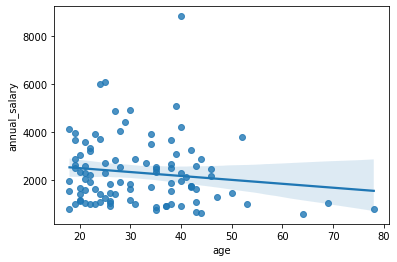

In [10]:
sns.regplot(x='age',y='annual_salary',data=df_cx,)

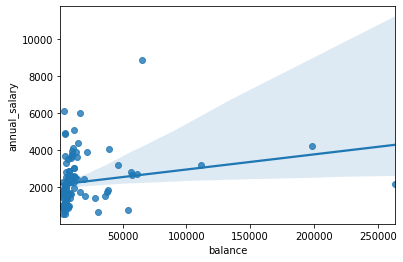

In [11]:
sns.regplot(x='balance',y='annual_salary',data=df_cx,)

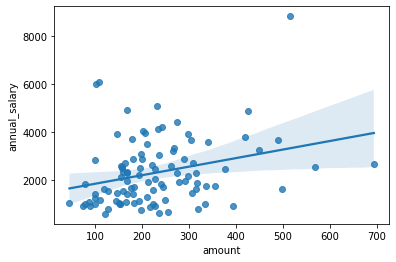

In [12]:
sns.regplot(x='amount',y='annual_salary',data=df_cx,)

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X=df_cx.drop("annual_salary",axis=1)
y=df_cx['annual_salary']

In [19]:

X=df_cx[["age","balance","amount","card_present_flag"]].values
y=df_cx["annual_salary"].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [23]:
lm= LinearRegression()

In [24]:
lm.fit(X_test,y_test)
lm.score(X_test,y_test)

0.29108953501834

In [26]:
predictions=lm.predict(X_test)

In [27]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

1318.871943452988
2582486.0386002013
1607.0115241031103


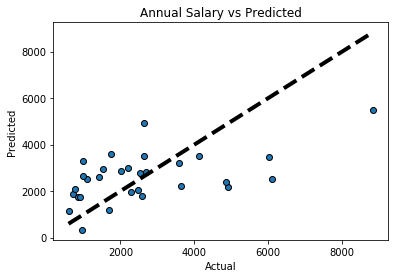

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

## Decison Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
y_pred = dt.predict(X_test)

In [44]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1125.8
1927770.5333333334
1388.441764473157


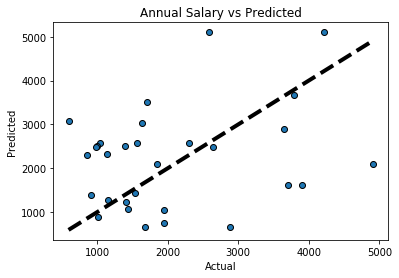

In [45]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()